In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (_, _) = mnist.load_data()

# Normalize the images
train_images = train_images.astype("float32") / 255.0

# Reshape the images to (batch_size, height, width, channels)
train_images = np.expand_dims(train_images, axis=3)

# Set the dimensions of the noise vector
latent_dim = 100

In [3]:
# Build the generator
generator = models.Sequential()
generator.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(latent_dim,)))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Reshape((7, 7, 256)))
generator.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='sigmoid'))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Build the discriminator
discriminator = models.Sequential()
discriminator.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))

discriminator.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the models
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
generator.compile(loss='binary_crossentropy', optimizer='adam')

In [6]:
# Build the GAN
gan = models.Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [7]:
# Train the GAN
batch_size = 128
epochs = 10
num_samples = 20

for epoch in range(epochs):
    for batch in range(train_images.shape[0] // batch_size):
        # Generate random noise as input to the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate fake images using the generator
        fake_images = generator.predict(noise)

        # Select a random batch of real images
        real_images = train_images[np.random.randint(0, train_images.shape[0], size=batch_size)]

        # Train the discriminator on the real and fake images
        discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print the losses every 10 epochs
        if (epoch + 1) % 10 == 0:

          print(f"Epoch {epoch + 1}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


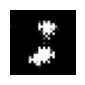

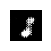

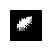

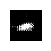

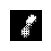

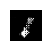

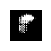

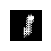

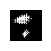

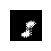

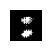

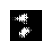

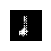

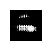

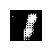

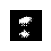

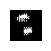

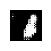

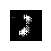

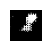

In [8]:
# Generate a sample of synthetic images to evaluate the generator
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_images = generator.predict(noise)
generated_images = generated_images.reshape((num_samples, 28, 28))

# Plot the synthetic images
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(10, 10, i + 1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
    plt.show()